# MDI220
# Statistics

# Project 

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Name: Leonardo Hannas de Carvalho Santos

## Imports

Please do **not** import any other library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [3]:
import seaborn as sns

## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [4]:
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [5]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [6]:
regions = list(df.region.unique())

In [7]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [8]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [9]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [10]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

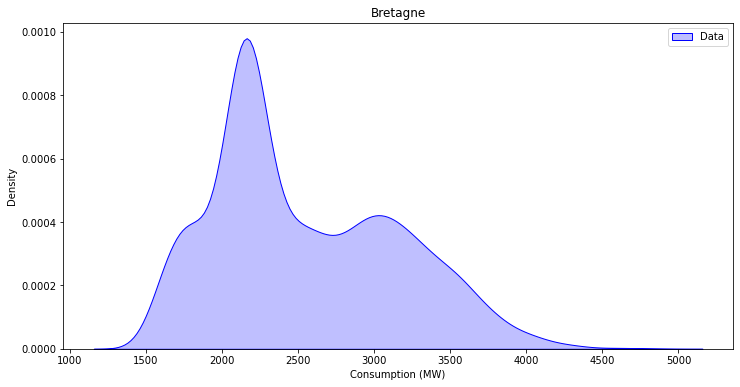

In [11]:
# density (with kde = kernel density estimation)
plt.figure(figsize=(12,6))
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

**1. Show that the estimators for the mean and the variance are unbiased.**

* Mean estimator:
    $$
    \begin{equation}
    b(\mu, \hat \mu) = E(\hat \mu) - \mu = E\left( \frac{1}{n} \sum_{i=1}^{n} x_{i}\right) - \mu = \frac{1}{n} E\left( \sum_{i=1}^{n} x_{i}\right) - \mu
    \end{equation}
    $$

    Since the observations are assumed to be i.i.d., the following equality is valid:
    $$
    \begin{equation}
    E\left( \sum_{i=1}^{n} x_{i}\right) = E(n x_{1})
    \end{equation}
    $$

    Therefore, the bias of the estimator for the mean will be:
    $$
    \begin{equation}
    b(\mu, \hat \mu) = \frac{1}{n} E(n x_{1}) - \mu = \frac{1}{n} n E(x_{1}) - \mu = E(x_{1}) - \mu
    \end{equation}
    $$

    Given that $x_{1}$ follows a Gaussian Distribution with parameters $\mu$ and $\sigma^{2}$, *i.e.*, $x_{1} \sim N(\mu, \sigma^{2})$ its expectation is $E(x_{1}) = \mu$.

    Finally, the bias of the mean estimator can be computed, as follows, showing that this estimator is unbiased.
    $$
    \begin{equation}
    b(\mu, \hat \mu) = \mu - \mu \Rightarrow  b(\mu, \hat \mu) = 0
    \end{equation}
    $$


* Variance estimator:

    Before computing the expectation of the variance estimator, some useful results are shown below:
    
    $$
    \begin{equation*}
    \left\{\begin{matrix}
Var(\hat \mu) = Var\left(\frac{1}{n} \sum_{i=1}^n x_i\right) = \frac{1}{n^{2}} Var \left(\sum_{i=1}^{n}x_{i}\right) = \frac{1}{n^{2}} \sum_{i=1}^{n} Var(x_{i}) = \frac{1}{n^{2}} n Var(x_{1}) = \frac{\sigma^{2}}{n}\\
E(\hat \mu^{2}) = Var(\hat \mu) + E^{2}(\hat \mu) = \frac{\sigma^{2}}{n} + \mu^{2}\\
E(x_{1}^{2}) = Var(x_{1}) + E^{2}(x_{1}) = \sigma^{2} + \mu^{2}
\end{matrix}\right.
    \end{equation*}
    $$
    
    Now, according to the definition of bias, we have:
    
    $$
    \begin{align*}
    b(\hat \sigma^{2}, \sigma^{2}) &= E(\hat \sigma^{2}, \sigma^{2}) - \sigma^{2} \\
    &= E \left(\frac{1}{n-1} \sum_{i=1}^{n} (x_{i} - \hat \mu)^{2}\right) - \sigma^{2} \\
    &= \frac{1}{n-1} E\left( \sum_{i=1}^{n} (x_{i} - \hat \mu)^{2}\right) - \sigma^{2} \\
    &= \frac{1}{n-1} E\left(\sum_{i=1}^{n} x_{i}^{2} - 2 \hat \mu \sum_{i=1}^{n} x_{i} + n \hat \mu^{2}\right) - \sigma^{2} \\
    &= \frac{1}{n-1} E\left(\sum_{i=1}^{n} x_{i}^{2} - 2 \hat \mu (n \hat \mu) + n \hat \mu^{2}\right) - \sigma^{2} \\
    &= \frac{1}{n-1} E\left(\sum_{i=1}^{n} x_{i}^{2} - 2 n \hat \mu^{2} + n \hat \mu^{2}\right) - \sigma^{2} \\
    &= \frac{1}{n-1} E\left(\sum_{i=1}^{n} x_{i}^{2} - n \hat \mu^{2}\right) - \sigma^{2} \\
    &= \frac{1}{n-1} \left(n E(x_{1}^{2}) - n E(\hat \mu^{2})\right) - \sigma^{2} \\
    &= \frac{n}{n-1} \left(E(x_{1}^{2}) - E(\hat \mu^{2})\right) - \sigma^{2} \\
    &= \frac{n}{n-1} \left(\sigma^{2} + \mu^{2} - \frac{\sigma^{2}}{n} - \mu^{2}\right) - \sigma^{2} \\
    &= \frac{n}{n-1} \left(\frac{(n-1) \sigma^{2}}{n}\right) - \sigma^{2} \\
    &= \sigma^{2} - \sigma^{2} \\
    &= 0
    \end{align*}
    $$
    
    Finally, given that $b(\hat \sigma^{2}, \sigma^{2}) = 0$, the estimator of the variance is also unbiased.

**2. Give the values obtained for the mean and the standard deviation using these estimators.**

We first create a separate dataframe for the region of Bretagne and we drop the redundant column 'region' of this new dataframe

In [12]:
bretagne_data = df_region.copy()
bretagne_data.drop(['region'], axis=1, inplace=True)
bretagne_data

,date,consumption
7606,2013-01-01,2595
7607,2013-01-02,3195
7608,2013-01-03,3157
7609,2013-01-04,3142
7610,2013-01-05,2859
...,...,...
11404,2023-05-27,1761
11405,2023-05-28,1610
11406,2023-05-29,1677
11407,2023-05-30,2057


Furthermore, four columns will be added into this dataframe, in order to facilitate the posterior work. From the column 'date', we will add the columns 'day', 'month' and 'year', as well as the 'winter year'

In [13]:
def get_day(date):
    return int(date[8:])

In [14]:
def get_month(date):
    month = int(date[5:7])
    switcher = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December" 
    }
    return switcher.get(month, "no month data")

In [15]:
def get_year(date):
    return int(date[:4])

In [16]:
def get_winter_year(date):
    
    day = int(date[8:])
    month = int(date[5:7])
    year = int(date[:4])
    
    if month == 1 or month == 2 or (month == 3 and day <= 21): 
        return int(year)

    elif (month == 12 and day >= 22):
        return int(year + 1)

In [17]:
bretagne_data['day'] = df_region['date'].apply(get_day)
bretagne_data['month'] = df_region['date'].apply(get_month)
bretagne_data['year'] = df_region['date'].apply(get_year)
bretagne_data['winter year'] = df_region['date'].apply(get_winter_year)

The final dataframe for Bretagne is shown below

In [18]:
bretagne_data

,date,consumption,day,month,year,winter year
7606,2013-01-01,2595,1,January,2013,2013.0
7607,2013-01-02,3195,2,January,2013,2013.0
7608,2013-01-03,3157,3,January,2013,2013.0
7609,2013-01-04,3142,4,January,2013,2013.0
7610,2013-01-05,2859,5,January,2013,2013.0
...,...,...,...,...,...,...
11404,2023-05-27,1761,27,May,2023,NaN
11405,2023-05-28,1610,28,May,2023,NaN
11406,2023-05-29,1677,29,May,2023,NaN
11407,2023-05-30,2057,30,May,2023,NaN


Finally, from this dataframe, we compute the values obtained for the mean and the standard deviation using the fournished estimators

In [19]:
bretagne_mean = bretagne_data['consumption'].mean()
print(f"Mean = {bretagne_mean}")

Mean = 2546.536155666579


In [20]:
bretagne_std_dev = bretagne_data['consumption'].std()
print(f"Standard Deviation = {bretagne_std_dev}")

Standard Deviation = 604.9429842099305


**3. Generate new data using the corresponding Gaussian model, with the same number of samples.**

To that, the number of samples to be generated is computed and we generate new data following the same Gaussian model

In [21]:
num_samples = len(bretagne_data['consumption'])
new_bretagne_data = norm.rvs(loc=bretagne_mean, scale=bretagne_std_dev, size=num_samples)

**4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.**

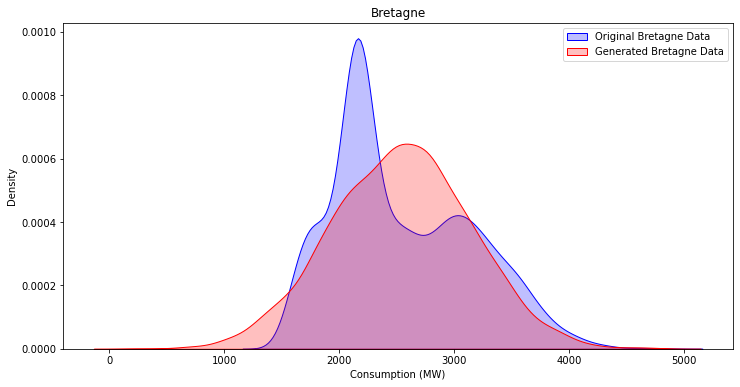

In [22]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=bretagne_data, x="consumption", label="Original Bretagne Data", color='blue', fill=True)
sns.kdeplot(data=new_bretagne_data, label="Generated Bretagne Data", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

**5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.**

We first compute a function called 'get_winter_data' to filter the data corresponding to the winter, i.e., from December 22 to March 21

In [23]:
def get_winter_data(day, month, year):
    full_winter_months = ["January", "February"]
    if month in full_winter_months:
        return True
    elif (month == "December") and (day >=22 and day <= 31):
        return True
    elif (month == "March") and (day >= 1 and day <= 21):
        return True
    else:
        return False

We apply this mask and we create another dataframe corresponding to the winter data from the region of Bretagne, called 'bretagne_winter_data'. It is shown below

In [24]:
bretagne_winter_data = bretagne_data[bretagne_data.apply(lambda row: get_winter_data(row['day'], row['month'], row['year']), axis=1)]
bretagne_winter_data

,date,consumption,day,month,year,winter year
7606,2013-01-01,2595,1,January,2013,2013.0
7607,2013-01-02,3195,2,January,2013,2013.0
7608,2013-01-03,3157,3,January,2013,2013.0
7609,2013-01-04,3142,4,January,2013,2013.0
7610,2013-01-05,2859,5,January,2013,2013.0
...,...,...,...,...,...,...
11333,2023-03-17,2609,17,March,2023,2023.0
11334,2023-03-18,2309,18,March,2023,2023.0
11335,2023-03-19,2206,19,March,2023,2023.0
11336,2023-03-20,2672,20,March,2023,2023.0


We can now compute the mean and the standard deviation using the estimators into this winter dataframe of the region of Bretagne

In [25]:
bretagne_winter_mean = bretagne_winter_data['consumption'].mean()
print(f"Mean = {bretagne_winter_mean}")

Mean = 3214.1782077393077


In [26]:
bretagne_winter_std_dev = bretagne_winter_data['consumption'].std()
print(f"Standard Deviation = {bretagne_winter_std_dev}")

Standard Deviation = 409.4763740819989


New data is now generated from the 'bretagne_winter_data' dataset, corresponding to a Gaussian Model 

In [27]:
num_samples = len(bretagne_winter_data['consumption'])
new_bretagne_winter_data = norm.rvs(loc=bretagne_winter_mean, scale=bretagne_winter_std_dev, size=num_samples, random_state = np.random)

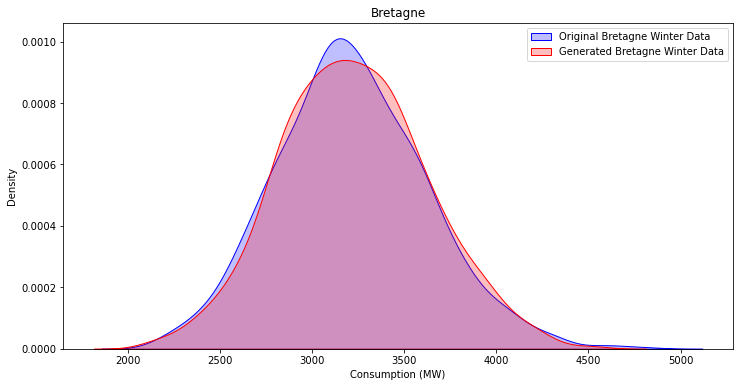

In [28]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=bretagne_winter_data, x="consumption", label="Original Bretagne Winter Data", color='blue', fill=True)
sns.kdeplot(data=new_bretagne_winter_data, label="Generated Bretagne Winter Data", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

**6. In which case the Gaussian model seems more appropriate?**

In the context of winter, the Gaussian model appears to be a better fit, possibly attributed to the unique electricity consumption patterns prevalent during this season. Thus, when applying the Gaussian model throughout the entire year, it should be viewed as a composite of Gaussian models, each with differing variances and means corresponding to various seasons. Consequently, when we isolate the dataset exclusively for the winter season, it becomes more homogeneous, making the adoption of the Gaussian model more suitable.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

**1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.**

* We fist check that $0 \leq d(f,g) \leq 1$.

    * Lower bound: using the reverese triangular inequality, we obtain

    $$
    \begin{equation*}
    d(f,g) = \frac{1}{2} \int |f(x) - g(x)|dx \geq \frac{1}{2} \left| \int \left[f(x) - g(x)\right] dx\right| = \frac{1}{2} \left| \int f(x) dx - \int g(x) dx\right| = \frac{1}{2} |1 - 1| = 0 \\
    \therefore d(f,g) = \frac{1}{2} \int |f(x) - g(x)|dx \geq 0
    \end{equation*}
    $$

    * Upper bound: by the triangular inequality, we obtain

    $$
    \begin{equation*}
    d(f,g) = \frac{1}{2} \int |f(x) - g(x)|dx = \frac{1}{2} \int |f(x) + (-g)(x)|dx \leq \frac{1}{2} \left( \int |f(x)|dx + \int |(-g)(x)|dx\right) = \frac{1}{2} \left( \int |f(x)|dx + \int |g(x)|dx\right)
    \end{equation*}
    $$

    Since that $f(x)$ and $g(x)$ are probability density functions, $f(x)$ and $g(x)$ are non negative $\forall x \in \mathbb{R}$ and their integral is unitary through their domains. Then, the inequality becomes:

    $$
    \begin{equation*}
    d(f,g) = \frac{1}{2} \int |f(x) - g(x)|dx \leq \frac{1}{2} \left( \int f(x) dx + \int g(x) dx\right) = \frac{1}{2} (1 + 1) = 1 \\
    \therefore d(f,g) = \frac{1}{2} \int |f(x) - g(x)|dx \leq 1
    \end{equation*}
    $$

    Therefore, it is true that $0 \leq d(f,g) \leq 1$.

* Now, we check that if $d(f,g) = 0 \iff f = g$ almost everywhere (for the Lebesgue measure).

    * ($\Rightarrow$) Direct sense: $d(f,g) = 0 \Rightarrow f = g$ almost everywhere
    
    Given that $d(f,g) = 0$ and, assuming for contradiction that $f(x) \neq g(x)$ $\forall x$ in a Lebesgue-measurable set E, then, in this set $|f(x) - g(x)| = \lambda > 0$, with $\lambda \in \mathbb{R_{+}^{\ast}}$. 
Consequently, the dissimilarity function will be:

    $$
    \begin{equation*}
    d(f,g) = \frac{1}{2} \int |f(x) - g(x)| dx = \frac{1}{2} \int_{E} \lambda dx > 0
    \end{equation*}
    $$
    
    This result is contraditory, given that, by assumption, $d(f,g) = 0$.

    * ($\Leftarrow$) Inverse sense: $f = g \Rightarrow d(f,g) = 0$ almost everywhere
    
    If $f = g$ almost everywhere, then:
    $$
    \begin{equation*}
    f(x) - g(x) = 0 \Rightarrow |f(x) - g(x)| = 0 \Rightarrow \int |f(x) - g(x)| dx = 0
    \end{equation*}
    $$
   
    Therefore, if $d(f,g) \Rightarrow f = g$ almost everywhere

* Finally, we check that $d(f,g) = 1 \iff f$ and $g$ have disjoint supports

$$
d(f, g) = 1 \iff \int{|f(x)-g(x)|dx} = 2 \iff\int_{\mathrm{Supp}(f)}|{f(x)-g(x)|dx} + \int_{\mathrm{Supp}(g)}|{f(x)-g(x)|dx} - \int_{\mathrm{Supp}(f) \cap \mathrm{Supp}(g)}|{f(x)-g(x)|dx} = 2.
$$

Given that 

$$
\int_{\mathrm{Supp}(f)}|{f(x)-g(x)|dx} \leq 1 \text{ and } \int_{\mathrm{Supp}(g)}|{f(x)-g(x)|dx} \leq 1,
$$

then 

$$
d(f,g) = 1 \iff \int_{\mathrm{Supp}(f) \cap \mathrm{Supp}(g)}|{f(x)-g(x)|dx} = 0.
$$

Now, let us assume for contradiction that $\mathrm{Supp}(f) \cap \mathrm{Supp}(g) \neq \emptyset$, then:

$$
\int_{\mathrm{Supp}(f)}|{f(x)-g(x)|dx} = \int_{\mathrm{Supp}(f) \cap \mathrm{Supp}(g)}|{f(x)-g(x)|dx} + \int_{\mathrm{Supp}(f)\setminus \mathrm{Supp}(f) \cap \mathrm{Supp}(g)}|{f(x)-g(x)|dx} \\
\int_{\mathrm{Supp}(f)}|{f(x)-g(x)|dx} = \int_{\mathrm{Supp}(f)\setminus \mathrm{Supp}(f) \cap \mathrm{Supp}(g)}|{f(x)-g(x)|dx} = \int_{\mathrm{Supp}(f)\setminus \mathrm{Supp}(f) \cap \mathrm{Supp}(g)}{f(x)dx} < 1
$$
   
This is contradictory, which leads to the fact that $d(f,g) = 1 \iff f$ and $g$ have disjoint supports, i.e., $\mathrm{Supp}(f) \cap \mathrm{Supp}(g) = \emptyset$.
    
    

    

**2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.**

The dissimilarity function is first defined

In [29]:
def d(f, g, dx):
    return 0.5 * np.sum(np.abs(f - g)) * dx

Now, in order to compute de value of the dissimilarity between $f$ and $g$, the inferior and superior limits of integration are defined. We also determine the number and the widht of each rectangle of the integration. Finally, the equations of $f$ and $g$ as functions of $x$ are computed and the dissimilarity between then is calculated

In [30]:
inferior_integration_limit = min(min(np.array(bretagne_data['consumption'])), min(new_bretagne_data))
superior_integration_limit = max(max(np.array(bretagne_data['consumption'])), max(new_bretagne_data))

number_samples = 5000
x = np.linspace(inferior_integration_limit, superior_integration_limit, number_samples)
dx = (superior_integration_limit - inferior_integration_limit) / number_samples

kde_f_values = gaussian_kde(np.array(bretagne_data['consumption'])).pdf(x)
pdf_g_values = norm.pdf(x, loc=bretagne_mean, scale=bretagne_std_dev)
print(f"Dissimilarity Bretagne = {d(kde_f_values, pdf_g_values, dx)}")

Dissimilarity Bretagne = 0.17902221387461914


**3. Do the same for the region Bretagne in winter and check your conclusion of part A.**

In [31]:
inferior_integration_limit = min(min(np.array(bretagne_winter_data['consumption'])), min(new_bretagne_winter_data))
superior_integration_limit = max(max(np.array(bretagne_winter_data['consumption'])), max(new_bretagne_winter_data))

number_samples = 5000
x = np.linspace(inferior_integration_limit, superior_integration_limit, number_samples)
dx = (superior_integration_limit - inferior_integration_limit) / number_samples

kde_f_values = gaussian_kde(np.array(bretagne_winter_data['consumption'])).pdf(x)
pdf_g_values = norm.pdf(x, loc=bretagne_winter_mean, scale=bretagne_winter_std_dev)
print(f"Dissimilarity Bretagne Winter = {d(kde_f_values, pdf_g_values, dx)}")

Dissimilarity Bretagne Winter = 0.029528793721854078


**4. Do the same for all regions. Give the result as a single dataframe.**

Firstly, four columns are added in the original dataframe. Given a date, it was splitted into three columns, which are *day*, *month* and *year*. In addtion, the fourth column added is the *winter year*, which stores winter year of the correspondent date. Finally, only the datapoints corresponding to a winter date were picked up and stored in another dataframe called *winter_data*

In [32]:
df['day'] = df['date'].apply(get_day)
df['month'] = df['date'].apply(get_month)
df['year'] = df['date'].apply(get_year)
df['winter year'] = df['date'].apply(get_winter_year)

df_winter_data = df[df.apply(lambda row: get_winter_data(row['day'], row['month'], row['year']), axis=1)]
df_winter_data

,region,date,consumption,day,month,year,winter year
0,Auvergne-Rhône-Alpes,2013-01-01,7560,1,January,2013,2013.0
1,Auvergne-Rhône-Alpes,2013-01-02,8700,2,January,2013,2013.0
2,Auvergne-Rhône-Alpes,2013-01-03,9367,3,January,2013,2013.0
3,Auvergne-Rhône-Alpes,2013-01-04,9133,4,January,2013,2013.0
4,Auvergne-Rhône-Alpes,2013-01-05,8283,5,January,2013,2013.0
...,...,...,...,...,...,...,...
45560,Île-de-France,2023-03-17,7780,17,March,2023,2023.0
45561,Île-de-France,2023-03-18,7104,18,March,2023,2023.0
45562,Île-de-France,2023-03-19,7168,19,March,2023,2023.0
45563,Île-de-France,2023-03-20,8218,20,March,2023,2023.0


In order to do same for all regions, an analogous procedure was adopted. The only difference is that a dictionary was instantiated to store the name of the region together with its dissimilarity value. Finnaly, this dictionary was used to build the dissimilarity dataframe

In [33]:
dissimilarity_results = {}

for region in regions:

    winter_data_aux = np.array(df_winter_data[df_winter_data['region'] == region]['consumption'])
    new_winter_data_aux = norm.rvs(loc=winter_data_aux.mean(), scale=winter_data_aux.std(), size=len(winter_data_aux))

    inferior_integration_limit = min((np.array(winter_data_aux)).min(), min(new_winter_data_aux))
    superior_integration_limit = max((np.array(winter_data_aux)).min(), max(new_winter_data_aux))

    number_samples = 5000
    x = np.linspace(inferior_integration_limit, superior_integration_limit, number_samples)
    dx = (superior_integration_limit - inferior_integration_limit) / number_samples

    kde_f_values = gaussian_kde(winter_data_aux).pdf(x)
    pdf_g_values = norm.pdf(x, loc=winter_data_aux.mean(), scale=winter_data_aux.std())

    dissimilarity_value = d(kde_f_values, pdf_g_values, dx)
    dissimilarity_results[region] = dissimilarity_value
    
    dissimilarity_df = pd.DataFrame(list(dissimilarity_results.items()), columns=['Region', 'Dissimilarity'])

In [34]:
dissimilarity_df.set_index('Region', inplace=True)
dissimilarity_df

,Dissimilarity
Region,
Auvergne-Rhône-Alpes,0.037077
Bourgogne-Franche-Comté,0.037253
Bretagne,0.028814
Centre-Val de Loire,0.042018
Grand Est,0.038361
Hauts-de-France,0.027169
Normandie,0.042404
Nouvelle-Aquitaine,0.053277
Occitanie,0.063062


**5. Which region is best fitted by a Gaussian model in winter?**

The region that is best fitted by a Gaussian model in winter is Hauts-de-France, because it has the lowest dissimilarity value, as shown in the output below

In [35]:
dissimilarity_df[dissimilarity_df['Dissimilarity'] == min(dissimilarity_df['Dissimilarity'])]

,Dissimilarity
Region,
Hauts-de-France,0.027169


**6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.**

In [36]:
winter_data_aux = np.array(df_winter_data[df_winter_data['region'] == 'Hauts-de-France']['consumption'])
new_winter_data_aux = norm.rvs(loc=winter_data_aux.mean(), scale=winter_data_aux.std(), size=len(winter_data_aux))

inferior_integration_limit = min((np.array(winter_data_aux)).min(), min(new_winter_data_aux))
superior_integration_limit = max((np.array(winter_data_aux)).min(), max(new_winter_data_aux))

number_samples = 5000
x = np.linspace(inferior_integration_limit, superior_integration_limit, number_samples)
dx = (superior_integration_limit - inferior_integration_limit) / number_samples

pdf_g_values = norm.rvs(loc=winter_data_aux.mean(), scale=winter_data_aux.std(), size=number_samples)

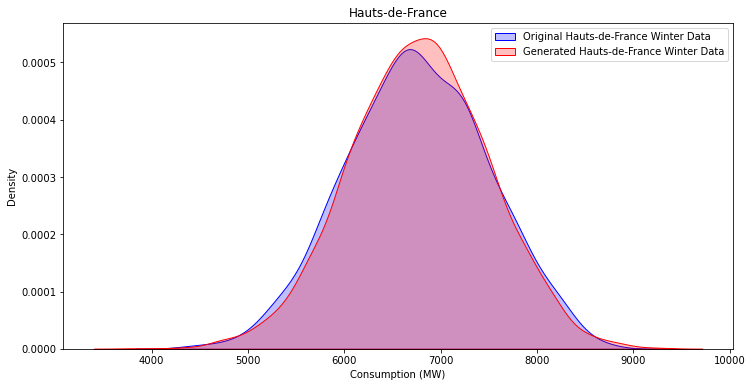

In [37]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=winter_data_aux, label="Original Hauts-de-France Winter Data", color='blue', fill=True)
sns.kdeplot(data=pdf_g_values, label="Generated Hauts-de-France Winter Data", color='red', fill=True)
plt.title('Hauts-de-France')
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0=3500$MW and standard deviation $\sigma_0=500$MW. 

**1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.**

From what was fournished, the prior distributiuon on $\mu$ is Gaussian, $\mu \sim N(\mu_{0}, \sigma_{0}^2)$, and its prior is given by:
$$
\begin{equation}
\pi(\mu) \propto exp \left[-\frac{1}{2\sigma_{0}^{2}}(\mu-\mu_{0}^2)\right]
\end{equation}
$$

In addition, $X \sim N(\mu, \sigma^2)$, and considering n i.i.d. observations, its probability density function will be:
$$
\begin{equation}
p(x|\mu) \propto exp \left[ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_{i}-\mu)^{2}\right]
\end{equation}
$$

Now the posterior can be computed as the product of the two previous distributions:
$$
\begin{align}
\pi(\mu|x) &\propto \pi(\mu) \times p(x|\mu) \\
           &\propto exp \left[-\frac{1}{2\sigma_{0}^{2}}(\mu-\mu_{0}^2)\right] \times exp \left[ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_{i}-\mu)^{2}\right] \\
           &\propto exp \left[-\frac{1}{2\sigma_{0}^{2}}(\mu^{2}-2\mu_{0}\mu+\mu_{0}^{2})-\frac{1}{2\sigma^2}\sum_{i=1}^{n}\left(x_{i}^{2}-2\mu x_{i} +\mu^{2}\right)\right] \\ 
           &\propto exp \left[-\frac{1}{2\sigma_{0}^{2}}\mu^{2}+\frac{\mu_{0}}{\sigma_{0}^{2}}\mu-\frac{\mu_{0}^{2}}{2\sigma_{0}^{2}}-\frac{1}{2\sigma^2}\sum_{i=1}^{n}x_{i}^{2}+\left(\frac{1}{\sigma^{2}}\sum_{i=1}^{n}x_{i}\right)\mu-\frac{n}{2\sigma^{2}}\mu^{2}\right] \\
           &\propto exp \left[-\frac{1}{2}\left(\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}\right)\mu^{2}+\left(\frac{\mu_{0}}{\sigma_{0}^{2}}+\frac{1}{\sigma^{2}}\sum_{i=1}^{n}x_{i}\right)\mu-\frac{1}{2}\left(\frac{\mu_{0}^{2}}{\sigma_{0}^{2}}+\frac{1}{\sigma^{2}}\sum_{i=1}^{n}x_{i}^{2}\right)\right] \\
           &\propto exp \left[-\frac{1}{2}\left(\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}\right)\left(\mu^{2}-2\left(\frac{\frac{\mu_{0}}{\sigma_{0}^{2}}+\frac{1}{\sigma^{2}}\sum_{i=1}^{n}x_{i}}{\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}}\right)\mu+\frac{\frac{\mu_{0}^{2}}{\sigma_{0}^{2}}+\frac{1}{\sigma^2}\sum_{i=1}^{n}x_{i}^{2}}{\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}}\right)\right] \\
           &\propto exp \left[-\frac{1}{2\left(\frac{1}{\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}}\right)}\left(\mu^{2}-2\left(\frac{\frac{\mu_{0}}{\sigma_{0}^{2}}+\frac{1}{\sigma^{2}}\sum_{i=1}^{n}x_{i}}{\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}}\right)\mu+\frac{\frac{\mu_{0}^{2}}{\sigma_{0}^{2}}+\frac{1}{\sigma^2}\sum_{i=1}^{n}x_{i}^{2}}{\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}}\right)\right]
\end{align}
$$

This means that the posterior has also a Gaussian Distribution, given by:

$$
\begin{equation}
\mu|x \sim N\left(\frac{\frac{\mu_{0}}{\sigma_{0}^{2}}+\frac{1}{\sigma^{2}}\sum_{i=1}^{n}x_{i}}{\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}},\frac{1}{\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}}\right)
\end{equation}
$$

In [38]:
sigma = 400
sigma_0 = 500
mu_0 = 3500
sum_xi = bretagne_winter_data['consumption'].sum()
n = len(bretagne_winter_data['consumption'])

In [39]:
posterior_mean = ((mu_0 / (sigma_0 ** 2)) + (sum_xi) / (sigma ** 2)) / ((1 / (sigma_0 ** 2)) + (n / (sigma ** 2)))
print(f"Posterior mean = {posterior_mean}")

Posterior mean = 3214.36436538305


In [40]:
posterior_variance = 1 / ((1 / (sigma_0 ** 2)) + (n / (sigma ** 2)))
print(f"Posterior variance = {posterior_variance}")

Posterior variance = 162.82667100871123


After having computed the values numerically, we arrive at the following distribution:

$$
\begin{equation}
\mu|x \sim N (3214.36,162.83)
\end{equation}
$$

**2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.**

We first compute a dataframe that contains the total energy consumption, during the winter, in the region of Bretagne, per year

In [41]:
annual_bretagne_winter_consumption = bretagne_winter_data.groupby('winter year').sum()
annual_bretagne_winter_consumption.drop(['day','year'], axis=1, inplace=True)
annual_bretagne_winter_consumption = annual_bretagne_winter_consumption.rename(columns={'consumption': 'total consumption (sum_xi)'})
annual_bretagne_winter_consumption

,total consumption (sum_xi)
winter year,
2013.0,271547
2014.0,278303
2015.0,290489
2016.0,284938
2017.0,294680
2018.0,299473
2019.0,285989
2020.0,284049
2021.0,302370


Now we calculate the number of winter days for each year, and we store in the following dartaframe

In [42]:
annual_bretagne_winter_days = bretagne_winter_data.groupby('winter year').count()
annual_bretagne_winter_days.drop(['consumption','day','month','year'], axis=1, inplace=True)
annual_bretagne_winter_days = annual_bretagne_winter_days.rename(columns={'date': 'number of winter days (n)'})
annual_bretagne_winter_days

,number of winter days (n)
winter year,
2013.0,80
2014.0,90
2015.0,90
2016.0,91
2017.0,90
2018.0,90
2019.0,90
2020.0,91
2021.0,90


We finally build a new dataframe to store the parameters of mean and variance of the posterior distribution, separated by year.

In [43]:
annual_parameters_posterior_distribution = pd.DataFrame(index=annual_bretagne_winter_consumption.index)
annual_parameters_posterior_distribution['posterior mean'] = ((mu_0 / (sigma_0 ** 2)) + annual_bretagne_winter_consumption['total consumption (sum_xi)'] / (sigma ** 2)) / ((1 / (sigma_0 ** 2)) + (annual_bretagne_winter_days['number of winter days (n)'] / (sigma ** 2)))
annual_parameters_posterior_distribution['posterior variance'] = 1 / ((1 / (sigma_0 ** 2)) + (annual_bretagne_winter_days['number of winter days (n)'] / (sigma ** 2)))
annual_parameters_posterior_distribution

,posterior mean,posterior variance
winter year,,
2013.0,3395.176091,1984.126984
2014.0,3095.134598,1765.225066
2015.0,3229.578553,1765.225066
2016.0,3133.762549,1745.962462
2017.0,3275.816417,1765.225066
2018.0,3328.695940,1765.225066
2019.0,3179.931598,1765.225066
2020.0,3124.061545,1745.962462
2021.0,3360.657546,1765.225066


**3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.**

We first grab the values of the posterior mean and the posterior variance for the year of 2023. Then, the standard deviation of the posterior distribution is calculated, as well as the number of samples of the posterior distribution of 2023, which is the number of winter days in this year. Given all these parameters, random values following the posterior distribution are generated.

In [44]:
bretagne_posterior_mean_winter_2023 = annual_parameters_posterior_distribution.loc[2023]['posterior mean']
bretagne_posterior_variance_winter_2023 = annual_parameters_posterior_distribution.loc[2023]['posterior variance']

bretagne_posterior_std_dev_winter_2023 = np.sqrt(bretagne_posterior_variance_winter_2023)
num_samples = annual_bretagne_winter_days.loc[2023]['number of winter days (n)']

bretagne_posterior_distribution_2023 = norm.rvs(loc=bretagne_posterior_mean_winter_2023, scale=bretagne_posterior_std_dev_winter_2023, size=num_samples)

Now, for the real data, it is just necessary to filter it from the 'bretagne_winter_data' dataframe, by selecting the column of energy consumption from the year of 2023

In [45]:
bretagne_real_data_2023 = np.array(bretagne_winter_data[bretagne_winter_data['winter year'] == 2023]['consumption'])

Finally, the plot of the two curves is made

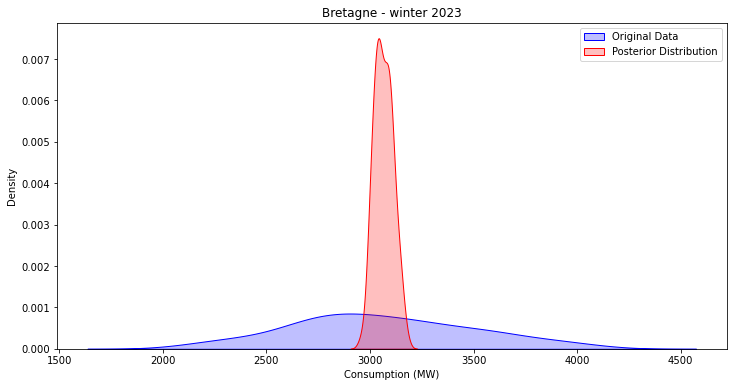

In [46]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=bretagne_real_data_2023, label="Original Data", color='blue', fill=True)
sns.kdeplot(data=bretagne_posterior_distribution_2023, label="Posterior Distribution", color='red', fill=True)
plt.title("Bretagne - winter 2023")
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

**4. Discuss the results, comparing to those obtained in part A.**

For the winter of 2023 in Bretagne, there is a discrepancy between the mean estimate and the posterior mean. Typically, the posterior mean is obtained by Bayesian statistical analysis, which produces a more complete estimate by updating previous knowledge with observed data. By the other side, the mean estimator does not take into account any previous knowledge, i.e., it is just dependent on observed data.

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.

**1. Propose a statistical test at level $\alpha$.**

We consider two hypotheses $H_{0}$ and $H_{1}$, given by:
- $H_{0} = \{\sigma = \sigma_{0} = 400\}$
- $H_{1} = \{\sigma = \sigma_{1} = 500\}$

Considering n i.i.d. observations, we compute the likelihood ratio $\frac{p_{1}(x)}{p_{0}(x)}$, related the two hypotheses.

$$
\begin{align*}
\frac{p_{1}(x)}{p_{0}(x)} &\propto \frac{exp \left[-\frac{1}{2\sigma_{1}^2}\sum_{i=1}^{n}(x_{i} - \mu)^{2}\right]}{exp \left[-\frac{1}{2\sigma_{0}^2}\sum_{i=1}^{n}(x_{i} - \mu)^{2}\right]}\\
&\propto exp\left[\frac{1}{2}\left(\frac{1}{\sigma_{0}^{2}}-\frac{1}{\sigma_{1}^{2}}\right)S\right]
\end{align*}
$$

where $S = \sum_{i=1}^{n}(x_{i}-\mu)^{2}$.

Given that $\sigma_{0} < \sigma_{1}$, the likelihood ratio is an increasing function of $x$. Therefore, the decision function is computed:

$$
\delta(x) = 1_{\left\{S>c\right\}},
$$

for some constant $c > 0$.

Since that $S \sim \sigma_{0}^{2} Z$, with $Z \sim \chi^{2}(n)$, then
the decision function is given by:

$$
\begin{align*}
\delta(x) &= 1_{\left \{ \sum_{i=1}^{n}(x_{i}-\mu)^{2} > c \right\}} \\
          &= 1_{\left\{Z\sigma_{0}^{2} > c\right\}} \\
          &= 1_{\left\{Z > \frac{c}{\sigma_{0}^{2}}\right\}}
\end{align*}
$$

Finally, the level $\alpha$ will be given by:

$$
\begin{align*}
\alpha &= P_{0}(\delta(x) = 1) \\
       &= P_{0}\left(Z > \frac{c}{\sigma_{0}^{2}}\right)
\end{align*}
$$

In order to compute the threshold $c$, we use the quantile function $Q$ of the $\chi^{2}(n)$ distribution.

$$
\begin{equation*}
\frac{c}{\sigma_{0}^{2}} = Q(1-\alpha)
\end{equation*}
$$

$$
\begin{equation*}
c = \sigma_{0}^{2} Q(1-\alpha)
\end{equation*}
$$


**2. Provide the result of this test for $\alpha=1\%$.**

We first define the constants and compute the sum $S$ and compare it to the threshold $c$, calculated using quantile function of the $\chi^{2}(n = 90)$ distribution

In [47]:
sigma_0 = 400
alpha = 0.01
mean = 3200
n = len(bretagne_real_data_2023)  # Energy consumption in Bretagne during winter 2023

In [48]:
s = ((bretagne_real_data_2023 - mean) ** 2).sum()
s

18736029

In [49]:
c = chi2.ppf(1-alpha, df=n) * (sigma_0 ** 2)
c

19858610.989779405

In [50]:
if s > c:
    print("H0 is rejected, i.e., the hypothesis of the variance of 400 is rejected")
else:
    print("H0 failed to be rejected, i.e., the hypothesis of the variance of 400 could not be rejected")

H0 failed to be rejected, i.e., the hypothesis of the variance of 400 could not be rejected


## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

**1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.**

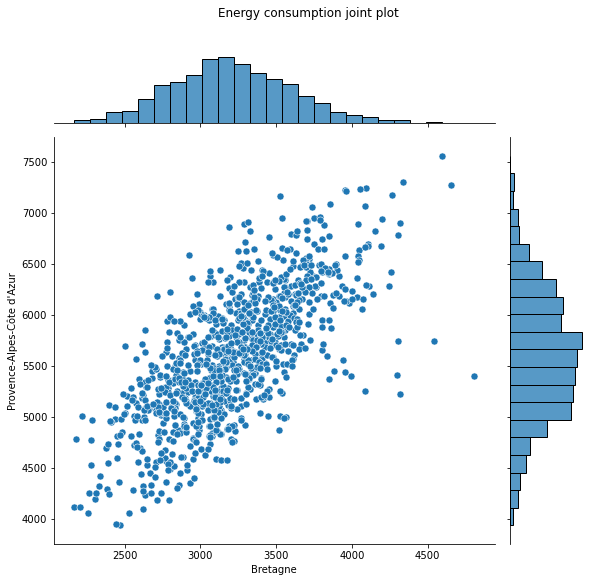

In [51]:
g = sns.jointplot(x=np.array(df_winter_data[df_winter_data['region'] == 'Bretagne']['consumption']),
              y=np.array(df_winter_data[df_winter_data['region'] == 'Provence-Alpes-Côte d\'Azur']['consumption']),
              kind="scatter", height=8, s=50)

g.set_axis_labels("Bretagne", "Provence-Alpes-Côte d\'Azur")
g.fig.suptitle("Energy consumption joint plot")

g.fig.subplots_adjust(top=0.9)

plt.show()

**2. Do you think the power consumption in these two regions is independent?**

We can observe that there is a relationship between the power consumption in these two regions, i.e., it is not independent. This is evident from the fact that when power consumption in Bretagne rises, there is a corresponding increase in power consumption in Provence-Alpes-Côte d'Azur.

**3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$.**

Let $X$ and $Y$ be the random variables for the energy consumption in Bretagne and Provence-Alpes-Côte d'Azur, respectively, during the winter. The null hypothesis is given by $H_{0} = \{X \perp Y\}$, where the energy consumptions are considered to be independent in between the regions. Moreover, the alternative hypothesis is $H_{1} = \{X \not \perp Y\}$.

Two partitions $A_{1}, A_{2}, \dots A_{K}$ and $B_{1}, B_{2}, \dots B_{L}$ are chosen for Bretagne and Provence-Alpes-Côte d'Azur, respectively, for the energy consumptions in the winter.

Let $T(X,Y)$ be the $\chi{2}$ statistic for independence, given by:

$$
\begin{equation*}
T(X,Y) = \sum_{i,j} \frac{\left(N_{ij} - \frac{N_i N_j}{n}\right)^{2}}{\frac{N_i N_j}{n}} 
\overset{d}{\rightarrow}
\chi^{2}((K-1)(L-1)) \text{ when }
n \rightarrow + \infty \text{.}
\end{equation*}
$$

We decide $1$ if $T(x,y) > c$, i.e., the test is given by:

$$
\begin{equation}
\delta(x,y) = 1_{\{T(x,y) > c\}}
\end{equation}
$$

Therefore, the test at level $\alpha$, under the null hypothesis will be:

$$
\begin{equation}
\alpha = P_{0}\left(T(X,Y) > c\right)
\end{equation}
$$

Given that we have a large number of samples $n$, we can compute the threshold $c$ using the quantile function $Q$ of the $\chi^2$ distribution with $(K-1)(L-1)$ degrees of freedom:

$$
\begin{equation}
c = Q(1 - \alpha).
\end{equation}
$$

**4. Give the result of this test for $\alpha=1\%$.**

We first build a dataframe 'bretagne_provence_consumption' containing the energy consumption during the winter days in both regions of Bretagne and Provence-Alpes-Côte d'Azur

In [52]:
bretagne_data = df_winter_data[df_winter_data['region'] == 'Bretagne']
provence_data = df_winter_data[df_winter_data['region'] == 'Provence-Alpes-Côte d\'Azur']

bretagne_provence_consumption = pd.DataFrame({'Bretagne': np.array(bretagne_data['consumption']),
                                              'Provence-Alpes-Côte d\'Azur': np.array(provence_data['consumption'])})

We now grab the interval range for the energy consumption in Bretagne and in Provence-Alpes-Côte d'Azur, by identifying the minimum and the maximum energy consumption datapoints for each region. Then, the lenght of each interval is chosen and the partitions for both regions are computed. Everything is finally placed in a dataframe, as shown below

In [53]:
max_bretagne_consumption = bretagne_provence_consumption['Bretagne'].max()
min_bretagne_consumption = bretagne_provence_consumption['Bretagne'].min()
max_provence_consumption = bretagne_provence_consumption['Provence-Alpes-Côte d\'Azur'].max()
min_provence_consumption = bretagne_provence_consumption['Provence-Alpes-Côte d\'Azur'].min()

lenght_partitions = 150

intervals_bretagne = np.arange(min_bretagne_consumption, max_bretagne_consumption, lenght_partitions)
intervals_provence = np.arange(min_provence_consumption, max_provence_consumption, lenght_partitions)

bretagne_provence_consumption_intervals = pd.DataFrame({'Bretagne interval' : pd.cut(bretagne_provence_consumption['Bretagne'], bins=intervals_bretagne),
                                                       'Provence-Alpes-Côte d\'Azur interval' : pd.cut(bretagne_provence_consumption['Provence-Alpes-Côte d\'Azur'], bins=intervals_provence)})
bretagne_provence_consumption_intervals

,Bretagne interval,Provence-Alpes-Côte d'Azur interval
0,"(2467, 2617]","(5290, 5440]"
1,"(3067, 3217]","(5740, 5890]"
2,"(3067, 3217]","(5890, 6040]"
3,"(3067, 3217]","(5890, 6040]"
4,"(2767, 2917]","(5440, 5590]"
...,...,...
977,"(2467, 2617]","(4390, 4540]"
978,"(2167, 2317]","(4240, 4390]"
979,"(2167, 2317]","(4090, 4240]"
980,"(2617, 2767]","(4240, 4390]"


From the dataframe above, a contingence table is computed, by counting the quantity of datapoints belonging to each interval

In [54]:
cross_table = pd.crosstab(bretagne_provence_consumption_intervals['Bretagne interval'], bretagne_provence_consumption_intervals['Provence-Alpes-Côte d\'Azur interval'])
cross_table

Provence-Alpes-Côte d'Azur interval,"(3940, 4090]","(4090, 4240]","(4240, 4390]","(4390, 4540]","(4540, 4690]","(4690, 4840]","(4840, 4990]","(4990, 5140]","(5140, 5290]","(5290, 5440]",...,"(5890, 6040]","(6040, 6190]","(6190, 6340]","(6340, 6490]","(6490, 6640]","(6640, 6790]","(6790, 6940]","(6940, 7090]","(7090, 7240]","(7240, 7390]"
Bretagne interval,,,,,,,,,,,,,,,,,,,,,
"(2167, 2317]",1,2,2,1,0,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"(2317, 2467]",1,0,4,1,2,4,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
"(2467, 2617]",1,0,1,1,2,7,4,7,7,2,...,0,0,0,0,0,0,0,0,0,0
"(2617, 2767]",0,3,5,4,5,3,4,17,7,8,...,0,1,0,0,0,0,0,0,0,0
"(2767, 2917]",0,1,3,7,6,3,11,14,15,17,...,5,0,1,0,0,0,0,0,0,0
"(2917, 3067]",0,0,1,1,5,10,11,14,15,15,...,12,3,2,3,1,0,0,0,0,0
"(3067, 3217]",0,0,0,0,3,5,9,18,21,17,...,9,8,3,3,0,0,1,0,0,0
"(3217, 3367]",0,0,0,0,0,1,4,4,8,14,...,18,14,9,3,4,2,3,0,0,0
"(3367, 3517]",0,0,0,0,0,0,1,2,8,5,...,9,16,8,6,4,1,0,0,0,0


From the contingence table above, the value of $T(X,Y)$ is computed, starting from $N_{i}$ and $N_{j}$ which are lists of the sum of the values in each row and column, respectively. Then, the number of rows of the table is assigned to the variable $K$ and the number of columns, to the variable $L$. Finally, the number of samples $n$ is also computed. Having all of this done, the value o $T(X,Y)$ is calculated

In [55]:
Ni = list(cross_table.sum(axis=1))
Nj = list(cross_table.sum(axis=0))

K = cross_table.shape[0]
L = cross_table.shape[1]

n = bretagne_provence_consumption_intervals.shape[0]

T_XY = 0
for i in range(K):
    for j in range(L):
        T_XY += ((cross_table.iloc[i, j] - (Ni[i] * Nj[j]) / n) ** 2) / ((Ni[i] * Nj[j]) / n) 
        
T_XY

1531.6818916799293

The last step is to compute the threshold $c$ and check the hypotheses $H_{0}$ and $H_{1}$

In [56]:
alpha = 0.01
c = chi2.ppf(1 - alpha, (K-1) * (L-1))
c

416.6492959110414

In [57]:
if T_XY > c:
    print("H0 is rejected, i.e., the hypothesis that the power consumption in these regions is independent is rejected")
else:
    print("H0 failed to be rejected, i.e., the power consumption is dependent in between these regions")

H0 is rejected, i.e., the hypothesis that the power consumption in these regions is independent is rejected


## F. Confidence intervals

Consider the region Bretagne in winter. 

**1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption.**

From the Section A of this project (Point Estimation), the unbiased estimators of mean and variance of the energy consumption were given. It has also been computed the variance of the mean estimator, which is:

$$
\begin{equation*}
\hat \mu = \frac{1}{n} \sum_{i=1}^{n} x_{i} \Rightarrow Var(\hat \mu) = \frac{\sigma^{2}}{n}
\end{equation*}
$$

We can normalize the distribution $\hat \mu$ and compute a normal random variable $Z$, such that $Z \sim \mathcal{N}(0,1)$.

$$
\begin{equation*}
Z = \frac{\hat \mu - \mu}{\sqrt{\hat \sigma^{2}/n}} = \frac{\sqrt{n}}{\hat \sigma} (\hat \mu - \mu)
\end{equation*}
$$

Now the confidence interval can be computed. Thus, given that $c = Q\left(1 - \left(\frac{1-\alpha}{2}\right)\right) = Q\left(\frac{\alpha+1}{2}\right)$, where $Q$ is the quantile function of the t-Student distribution, we obtain:

$$
P_{\mu}(-c \leq Z \leq c) = 1 - \alpha\\
P_{\mu}\left(-c \leq \frac{\sqrt{n}}{\hat \sigma} (\hat \mu - \mu) \leq c\right) = 1 - \alpha\\
P_{\mu}\left(\hat \mu - \frac{c\hat\sigma}{\sqrt{n}} \leq \mu \leq \hat \mu + \frac{c \hat \sigma}{\sqrt{n}}\right) = 1 - \alpha\\
P_{\mu}\left(\mu \in \left[\hat \mu - \frac{c\hat\sigma}{\sqrt{n}} , \hat \mu + \frac{c \hat \sigma}{\sqrt{n}}\right]\right) = 1 - \alpha
$$

Therefore, the confidence interval $\delta(\mu)$ is given by:
$$
\delta(\mu) = \left[\hat \mu - \frac{c\hat\sigma}{\sqrt{n}} , \hat \mu + \frac{c \hat \sigma}{\sqrt{n}}\right]
$$




In [58]:
n = len(bretagne_winter_data)
mean_estimator = bretagne_winter_mean
alpha = 0.95

In [59]:
c = t.ppf((alpha + 1) / 2, df=n - 1)
confidence_interval_lower_bound = mean_estimator - (c * sigma / np.sqrt(n)),
confidence_interval_upper_bound = mean_estimator + (c * sigma / np.sqrt(n))

In [60]:
print(f"For the mean power consumption, a confidence interval at level alpha = 95% is: [{confidence_interval_lower_bound[0]:.2f}, {confidence_interval_upper_bound:.2f}]")

For the mean power consumption, a confidence interval at level alpha = 95% is: [3189.13, 3239.23]


**2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.**

The hypotheses are $H_{0} = \{\mu = 3100\}$ and $H_{1} = \{\mu \neq 3100\}$. Moreover, 

$$
Z = \frac{\hat \mu - \mu}{\sqrt{\hat \sigma^{2}/n}} = \frac{\sqrt{n}}{\hat \sigma} (\hat \mu - \mu) \sim St(n-1)
$$

This will be a two-tailed decision function given by:

$$
\delta(\mu) = 1_{\{|t| > c\}},
$$

in which $c$ is the value of the t-Student's quatile function with $n-1$ degrees of freedom evaluated at $1 - \frac{\alpha}{2}$.

In [61]:
n = len(bretagne_real_data_2023)
mu = 3100
alpha = 0.05
mean_estimator = bretagne_real_data_2023.mean()
std_dev_estimator = bretagne_real_data_2023.std()

In [62]:
c = t.ppf(1 - (alpha / 2), n - 1)
Z = (mean_estimator - 3100)/(std_dev_estimator / np.sqrt(n))

In [63]:
if np.abs(Z) > c:
    print(f"We reject the null hypothesis, given that |Z| = {np.abs(Z):.2f} > c = {c:.2f}")
else:
    print(f"We fail to reject the null hypothesis, given that |Z| = {np.abs(Z):.2f} <= c = {c:.2f}")  

We fail to reject the null hypothesis, given that |Z| = 0.92 <= c = 1.99
